In [93]:
! git clone https://github.com/myabcc17/Vision.git

fatal: destination path 'Vision' already exists and is not an empty directory.


In [95]:
! pip install opencv-python==3.4.2.16
! pip install opencv-contrib-python==3.4.2.16

In [94]:
from skimage import color
from skimage import io
from matplotlib import pyplot as plt
import scipy
import numpy as np
from scipy import signal
import cv2 as cv

# Project2-1 : harris corner detection
originalImg = color.rgb2gray(io.imread('Vision/Project2/img1.jpg'))

# Sobel 커널을 생성하는 부분
def gradient_x(imggray):
    # Sobel operator kernels.
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    return signal.convolve2d(imggray, kernel_x, mode='same')
def gradient_y(imggray):
    # Sobel operator kernels.
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return signal.convolve2d(imggray, kernel_y, mode='same')

I_x = gradient_x(originalImg)
I_y = gradient_y(originalImg)

def gaussian_kernel(size, sigma=1) :
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g = np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

print("Define gaussian_kernel")

def get_interest_points(originalImg):
    # Intensity의 변화가 큰 영역 = Corner!!
    I_xx = I_x ** 2
    I_xy = I_x * I_y
    I_yy = I_y ** 2

    gKernel = gaussian_kernel(5, 1.4)
    gI_xx = signal.convolve2d(I_xx, gKernel, mode="same")
    gI_xy = signal.convolve2d(I_xy, gKernel, mode="same")
    gI_yy = signal.convolve2d(I_yy, gKernel, mode="same")

    fig, axs = plt.subplots(1, 3, figsize=(9, 3))
    axs[0].imshow(gI_xx, cmap="gray")
    axs[0].text(0.5, -0.18, '(a) I_xx', size=12, ha='center', transform=axs[0].transAxes)

    axs[1].imshow(gI_xy, cmap="gray")
    axs[1].text(0.5, -0.18, '(b) I_xy', size=12, ha='center', transform=axs[1].transAxes)

    axs[2].imshow(gI_yy, cmap="gray")
    axs[2].text(0.5, -0.18, '(c) I_yy', size=12, ha='center', transform=axs[2].transAxes)

    image_copy = color.gray2rgb(originalImg)
    height = originalImg.shape[0]
    width = originalImg.shape[1]
    alpha = 0.04
    window_size = 5
    offset = window_size // 2

    # 각 pixel에서 gradient의 제곱의 합을 계산. offset에 따라 window 이동한다.
    corner = np.zeros((height, width), np.float32)
    for y in range(window_size, height - window_size):
        for x in range(window_size, width - window_size):
            Sxx = np.sum(gI_xx[y - offset:y + 1 + offset, x - offset:x + 1 + offset])
            Sxy = np.sum(gI_xy[y - offset:y + 1 + offset, x - offset:x + 1 + offset])
            Syy = np.sum(gI_yy[y - offset:y + 1 + offset, x - offset:x + 1 + offset])

            # Harris 코너를 판별하는 식
            det = Sxx * Syy - Sxy ** 2
            trace = Sxx + Syy
            corner[y, x] = det - alpha * trace ** 2

    thresh = 0.01 * corner.max()
    image_copy[corner > thresh] = [255, 0, 0]

    fig, axs = plt.subplots(1, 2, figsize=(8, 6.5))
    axs[0].imshow(originalImg, cmap='gray')
    axs[1].imshow(image_copy)
    plt.show()




Define gaussian_kernel


In [0]:
# Project2-2 : SIFT-like local
import cv2 as cv
from matplotlib import pyplot as plt

def get_features(filename):
  image = cv.imread(filename)
  gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY) # image to Gray
  sift = cv.xfeatures2d.SIFT_create() # SIFT Descriptor 생성
  kp = sift.detect(gray_image, None) # keyPoint 검출
  result = cv.drawKeypoints(gray_image, kp, image) # keyPoint를 result에 표시한다.
  fig, axs = plt.subplots(1,1, figsize=(12,8))
  axs.imshow(result)
  plt.show()



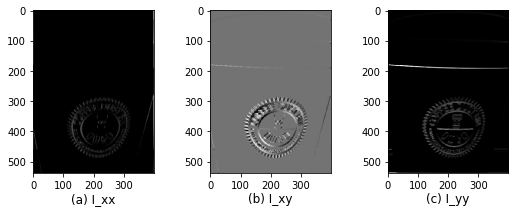

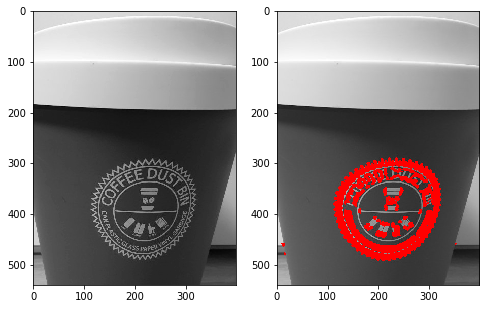

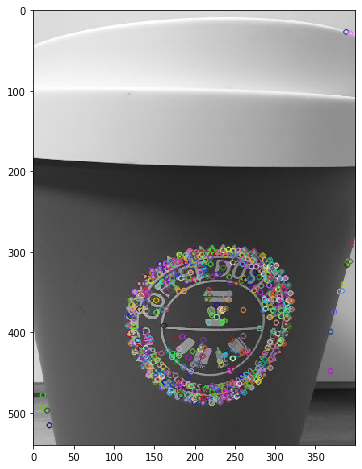

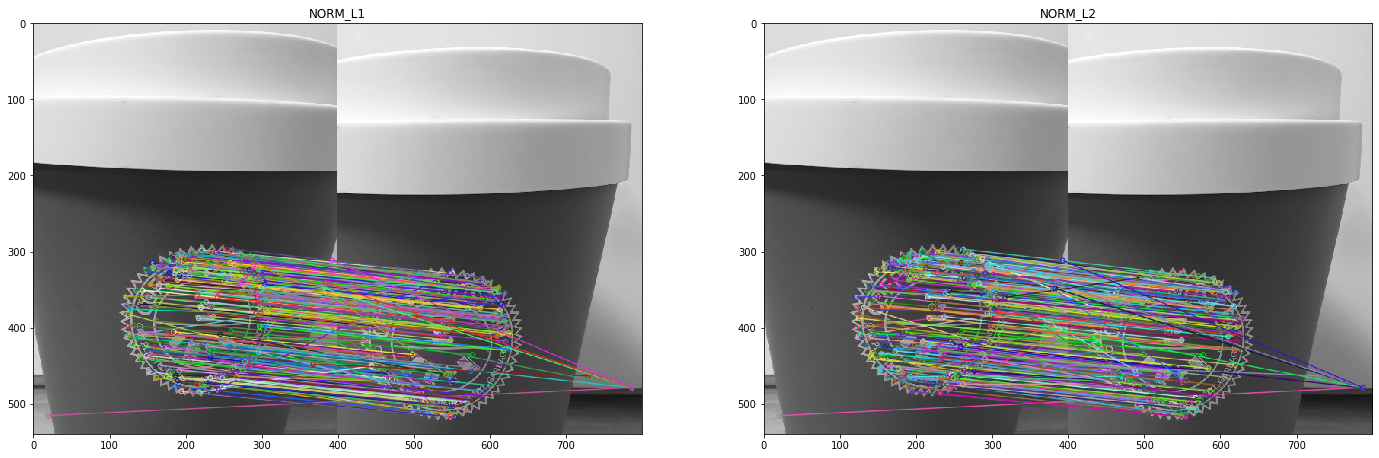

In [106]:
img1 = color.rgb2gray(cv.imread("Vision/Project2/img1.jpg", 0))
img2 = color.rgb2gray(cv.imread("Vision/Project2/img2.jpg", 0))

# Project2-1: harris cornet detext
get_interest_points(img1)

# Project2-2: SIFT
get_features('Vision/Project2/img1.jpg')

# Project2-3: Ratio test with various distance measure
fig, axs = plt.subplots(1, 2, figsize=(24,16))

sift = cv.xfeatures2d_SIFT.create() # SIFT Descriptor를 생성한다.
kp1, des1 = sift.detectAndCompute(img1,None) # image에서 keyPoint와 Descriptor를 한번에 계산
kp2, des2 = sift.detectAndCompute(img2,None)

# measurement = NORM_L1
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=False) # BFMatcher의 첫번째인자에서 거리 기준(Distance Measure)을 설정할 수 있다.
matches = bf.knnMatch(des1,des2, k=2)
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2) # keyPoint들을 img3에 표시해준다.
axs[0].set_title("NORM_L1")
axs[0].imshow(img3)

# measurement = NORM_L2
bf = cv.BFMatcher(cv.NORM_L2, crossCheck=False)
matches = bf.knnMatch(des1,des2, k=2)
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)
axs[1].set_title("NORM_L2")
axs[1].imshow(img3)



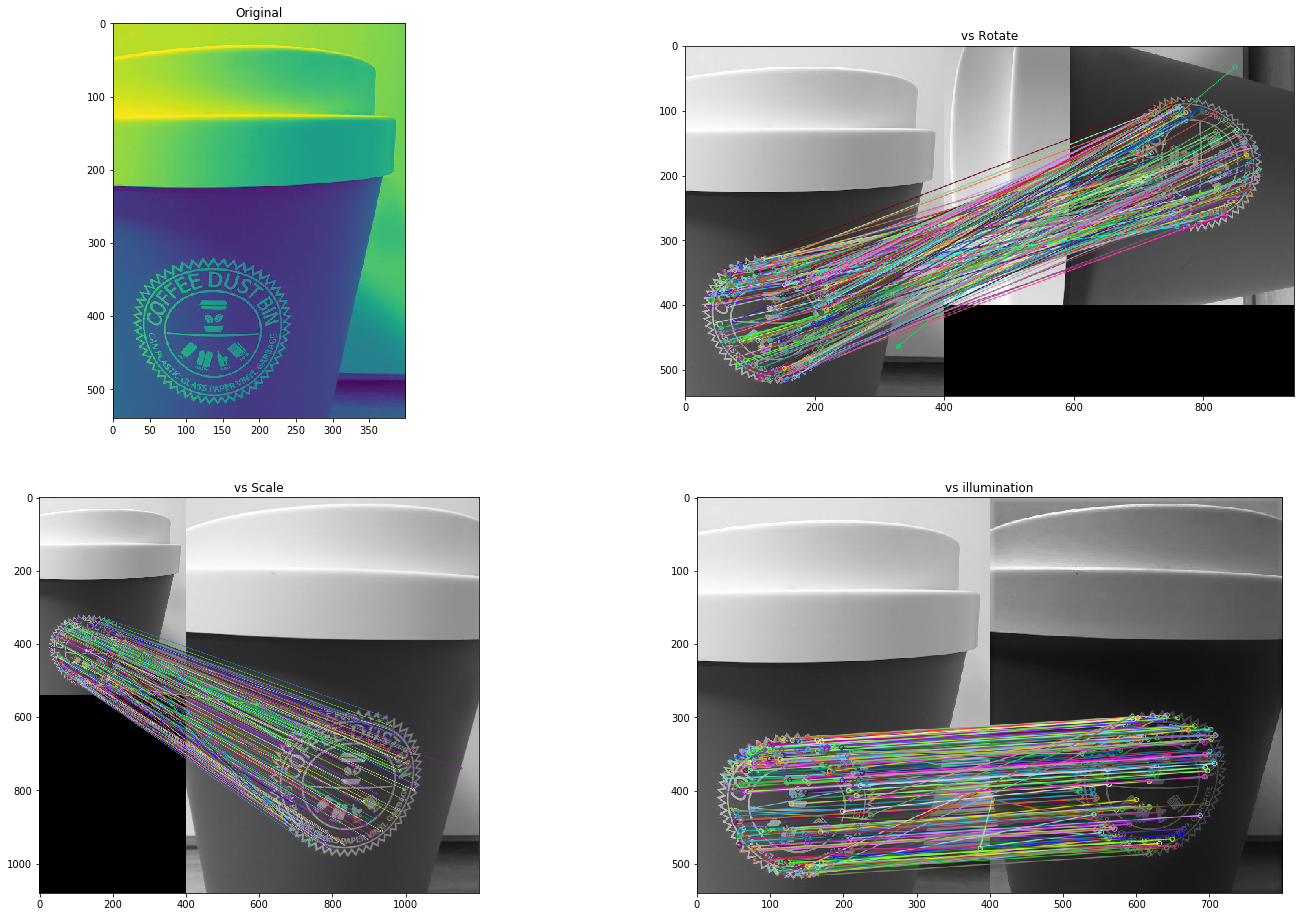

In [107]:
import cv2 as cv

# Experiment 1: several issue and analyze the result
img = color.rgb2gray(cv.imread("Vision/Project2/img2.jpg", 0)) # Original image
img_rotate = color.rgb2gray(cv.imread("Vision/Project2/img1_rotate.jpg", 0)) # Rotate image
img_scale2x = color.rgb2gray(cv.imread("Vision/Project2/img1.jpg", 0)) # rescale 2x
img_scale2x = cv.resize(img_scale2x, dsize=(0,0), fx=2.0, fy=2.0, interpolation=cv.INTER_LINEAR) 
img_illumination = color.rgb2gray(cv.imread("Vision/Project2/img1_illumination.jpg", 0)) # illumination image

fig, axs = plt.subplots(2, 2, figsize=(24,16))

# SIFT
sift = cv.xfeatures2d_SIFT.create()
kp1, des1 = sift.detectAndCompute(img,None)
kp2, des2 = sift.detectAndCompute(img_rotate,None)
kp3, des3 = sift.detectAndCompute(img_scale2x,None)
kp4, des4 = sift.detectAndCompute(img_illumination,None)
bf = cv.BFMatcher(cv.NORM_L2)
axs[0][0].set_title("Original")
axs[0][0].imshow(img)

# vs Rotation
matches = bf.knnMatch(des1,des2, k=2)
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
img2 = cv.drawMatchesKnn(img,kp1,img_rotate,kp2,good,None,flags=2)
axs[0][1].set_title("vs Rotate")
axs[0][1].imshow(img2)

# vs Scale
matches = bf.knnMatch(des1,des3, k=2)
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
img2 = cv.drawMatchesKnn(img,kp1,img_scale2x,kp3,good,None,flags=2)
axs[1][0].set_title("vs Scale")
axs[1][0].imshow(img2)

# vs illumination
matches = bf.knnMatch(des1,des4, k=2)
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
img2 = cv.drawMatchesKnn(img,kp1,img_illumination,kp4,good,None,flags=2)
axs[1][1].set_title("vs illumination")
axs[1][1].imshow(img2)

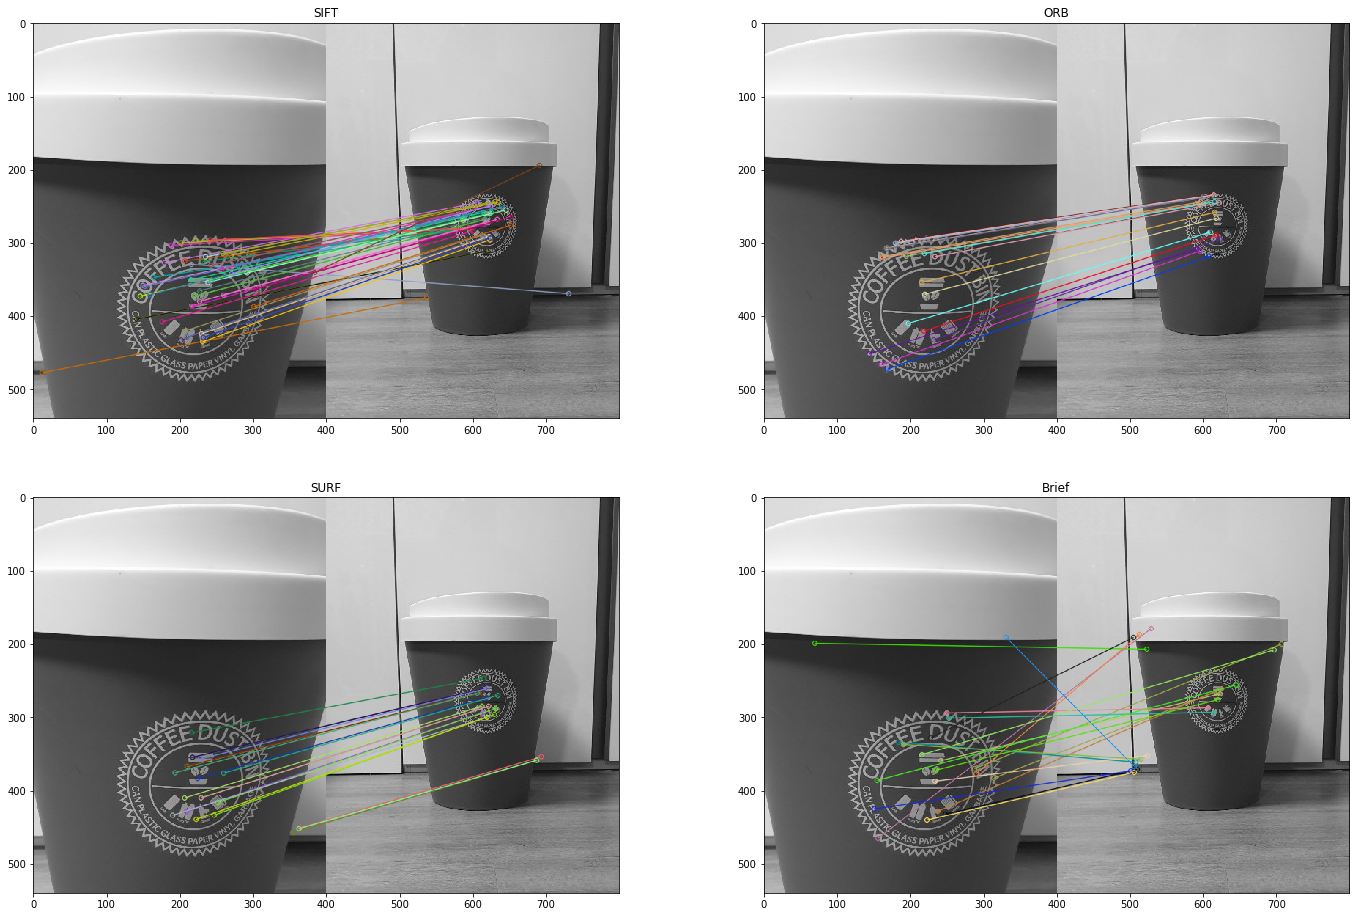

In [99]:
# Experiment 2: Compare with ORB, SURF, DAISY, BRIEF, etc...
img1 = cv.imread("Vision/Project2/img1.jpg", 0) # queryImage
img2 = cv.imread("Vision/Project2/img3.jpg", 0) # trainImage
fig, axs = plt.subplots(2, 2, figsize=(24,16))

# SIFT
sift = cv.xfeatures2d_SIFT.create()
sift_kp1, sift_des1 = sift.detectAndCompute(img1,None)
sift_kp2, sift_des2 = sift.detectAndCompute(img2,None)
sift_bf = cv.BFMatcher(cv.NORM_L2)
sift_matches = sift_bf.knnMatch(sift_des1,sift_des2, k=2)
good = []
for m,n in sift_matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
sift_img = cv.drawMatchesKnn(img1,sift_kp1,img2,sift_kp2,good,None,flags=2)
axs[0][0].set_title("SIFT")
axs[0][0].imshow(sift_img)

# ORB
orb = cv.ORB_create()
orb_kp1, orb_des1 = orb.detectAndCompute(img1, None)
orb_kp2, orb_des2 = orb.detectAndCompute(img2, None)
orb_bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
orb_matches = orb_bf.match(orb_des1, orb_des2)
orb_matches = sorted(orb_matches, key=lambda x: x.distance)
orb_img = cv.drawMatches(img1, orb_kp1, img2, orb_kp2, orb_matches[:20], None, flags=2)
axs[0][1].set_title("ORB")
axs[0][1].imshow(orb_img)

# SURF
surf = cv.xfeatures2d.SURF_create(800)
surf_kp1, surf_des1 = surf.detectAndCompute(img1, None)
surf_kp2, surf_des2 = surf.detectAndCompute(img2, None)
surf_bf = cv.BFMatcher(cv.NORM_L2, crossCheck=False)
surf_matches = surf_bf.match(surf_des1, surf_des2)
surf_matches = sorted(surf_matches, key=lambda x: x.distance)
surf_img = cv.drawMatches(img1, surf_kp1, img2, surf_kp2, surf_matches[:20], None, flags=2)
axs[1][0].set_title("SURF")
axs[1][0].imshow(surf_img)

# BRIEF
star = cv.xfeatures2d_StarDetector.create()
brief = cv.xfeatures2d_BriefDescriptorExtractor.create()
b_kp1 = star.detect(img1, None)
b_kp2 = star.detect(img2, None)
b_kp1, b_des1 = brief.compute(img1, b_kp1)
b_kp2, b_des2 = brief.compute(img2, b_kp2)
b_bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
b_matches = b_bf.match(b_des1, b_des2)
b_matches = sorted(b_matches, key=lambda x: x.distance)
b_img = cv.drawMatches(img1, b_kp1, img2, b_kp2, b_matches[:20], None, flags=2)
axs[1][1].set_title("Brief")
axs[1][1].imshow(b_img)

plt.show()